<a href="https://colab.research.google.com/github/VijayKumarMunavalli37506/Assignments/blob/master/ineuron_machine_learning_challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## ineuron Competition for House Prices

In [1]:
# Import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


**Upload the Excel to Colab**

---



In [0]:
from google.colab import files
uploaded = files.upload()

Saving housing_train.xlsx to housing_train.xlsx


In [0]:
df.head()

,id,url,region,region_url,price,type,sqfeet,beds,baths,cats_allowed,...,wheelchair_access,electric_vehicle_charge,comes_furnished,laundry_options,parking_options,image_url,description,lat,long,state
0,7039061606,https://bham.craigslist.org/apa/d/birmingham-h...,birmingham,https://bham.craigslist.org,1195,apartment,1908,3,2.0,1,...,0,0,0,laundry on site,street parking,https://images.craigslist.org/00L0L_80pNkyDeG0...,Apartments In Birmingham AL Welcome to 100 Inv...,33.4226,-86.7065,al
1,7041970863,https://bham.craigslist.org/apa/d/birmingham-w...,birmingham,https://bham.craigslist.org,1120,apartment,1319,3,2.0,1,...,0,0,0,laundry on site,off-street parking,https://images.craigslist.org/00707_uRrY9CsNMC...,Find Your Way to Haven Apartment Homes Come ho...,33.3755,-86.8045,al
2,7041966914,https://bham.craigslist.org/apa/d/birmingham-g...,birmingham,https://bham.craigslist.org,825,apartment,1133,1,1.5,1,...,0,0,0,laundry on site,street parking,https://images.craigslist.org/00h0h_b7Bdj1NLBi...,Apartments In Birmingham AL Welcome to 100 Inv...,33.4226,-86.7065,al
3,7041966936,https://bham.craigslist.org/apa/d/birmingham-f...,birmingham,https://bham.craigslist.org,800,apartment,927,1,1.0,1,...,0,0,0,laundry on site,street parking,https://images.craigslist.org/00808_6ghZ8tSRQs...,Apartments In Birmingham AL Welcome to 100 Inv...,33.4226,-86.7065,al
4,7041966888,https://bham.craigslist.org/apa/d/birmingham-2...,birmingham,https://bham.craigslist.org,785,apartment,1047,2,1.0,1,...,0,0,0,laundry on site,street parking,https://images.craigslist.org/00y0y_21c0FOvUXm...,Apartments In Birmingham AL Welcome to 100 Inv...,33.4226,-86.7065,al


In [0]:
df['price'].value_counts()

750     2792
850     2722
1200    2714
800     2680
950     2467
        ... 
7478       1
151        1
5175       1
3276       1
3631       1
Name: price, Length: 3753, dtype: int64

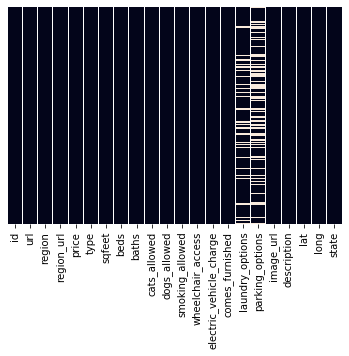

In [0]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False)

In [0]:
df.shape

(265190, 22)

In [0]:
df.isnull().sum()

id                             0
url                            0
region                         0
region_url                     0
price                          0
type                           0
sqfeet                         0
beds                           0
baths                          0
cats_allowed                   0
dogs_allowed                   0
smoking_allowed                0
wheelchair_access              0
electric_vehicle_charge        0
comes_furnished                0
laundry_options            54311
parking_options            95135
image_url                      0
lat                         1419
long                        1419
state                          1
dtype: int64

In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 265190 entries, 0 to 265189
Data columns (total 21 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   id                       265190 non-null  int64  
 1   url                      265190 non-null  object 
 2   region                   265190 non-null  object 
 3   region_url               265190 non-null  object 
 4   price                    265190 non-null  int64  
 5   type                     265190 non-null  object 
 6   sqfeet                   265190 non-null  int64  
 7   beds                     265190 non-null  int64  
 8   baths                    265190 non-null  float64
 9   cats_allowed             265190 non-null  int64  
 10  dogs_allowed             265190 non-null  int64  
 11  smoking_allowed          265190 non-null  int64  
 12  wheelchair_access        265190 non-null  int64  
 13  electric_vehicle_charge  265190 non-null  int64  
 14  come

In [0]:
df.drop(['region_url'],axis=1,inplace=True)

In [0]:
df['lat']=df['lat'].fillna(df['lat'].mode()[0])
df['long']=df['long'].fillna(df['long'].mode()[0])

In [0]:
df['laundry_options']=df['laundry_options'].fillna(df['laundry_options'].mode()[0])
df['parking_options']=df['parking_options'].fillna(df['parking_options'].mode()[0])

In [0]:
df['state']=df['state'].fillna(df['state'].mode()[0])


In [0]:
df.drop(['id'],axis=1,inplace=True)

In [0]:
df.shape

(265190, 20)

In [0]:
df.isnull().sum()

region                     0
price                      0
type                       0
sqfeet                     0
beds                       0
baths                      0
cats_allowed               0
dogs_allowed               0
smoking_allowed            0
wheelchair_access          0
electric_vehicle_charge    0
comes_furnished            0
laundry_options            0
parking_options            0
lat                        0
long                       0
state                      0
dtype: int64

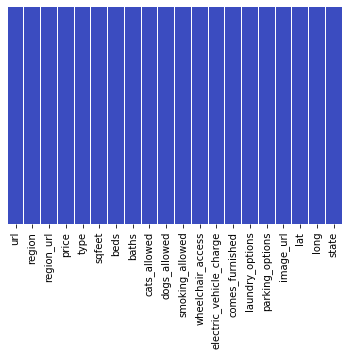

In [0]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='coolwarm')

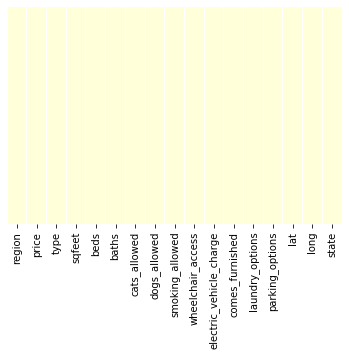

In [0]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='YlGnBu')

In [0]:
df.shape

(265190, 17)

In [0]:
df.head()

,region,price,type,sqfeet,beds,baths,cats_allowed,dogs_allowed,smoking_allowed,wheelchair_access,electric_vehicle_charge,comes_furnished,laundry_options,parking_options,lat,long,state
0,birmingham,1195,apartment,1908,3,2.0,1,1,1,0,0,0,laundry on site,street parking,33.4226,-86.7065,al
1,birmingham,1120,apartment,1319,3,2.0,1,1,1,0,0,0,laundry on site,off-street parking,33.3755,-86.8045,al
2,birmingham,825,apartment,1133,1,1.5,1,1,1,0,0,0,laundry on site,street parking,33.4226,-86.7065,al
3,birmingham,800,apartment,927,1,1.0,1,1,1,0,0,0,laundry on site,street parking,33.4226,-86.7065,al
4,birmingham,785,apartment,1047,2,1.0,1,1,1,0,0,0,laundry on site,street parking,33.4226,-86.7065,al


In [0]:
##HAndle Categorical Features

In [0]:
columns=['region','type','laundry_options','parking_options','state']

In [0]:
len(columns)

5

In [0]:
def category_onehot_multcols(multcolumns):
    df_final=final_df
    i=0
    for fields in multcolumns:
        
        print(fields)
        df1=pd.get_dummies(final_df[fields],drop_first=True)
        
        final_df.drop([fields],axis=1,inplace=True)
        if i==0:
            df_final=df1.copy()
        else:
            
            df_final=pd.concat([df_final,df1],axis=1)
        i=i+1
       
        
    df_final=pd.concat([final_df,df_final],axis=1)
        
    return df_final

In [0]:
final_df=df.copy()

In [0]:
final_df.isnull().sum()

region                     0
price                      0
type                       0
sqfeet                     0
beds                       0
baths                      0
cats_allowed               0
dogs_allowed               0
smoking_allowed            0
wheelchair_access          0
electric_vehicle_charge    0
comes_furnished            0
laundry_options            0
parking_options            0
lat                        0
long                       0
state                      0
dtype: int64

In [0]:
final_df['price']

0         1195
1         1120
2          825
3          800
4          785
          ... 
265185       0
265186    1069
265187    1507
265188    1001
265189    1164
Name: price, Length: 265190, dtype: int64

In [0]:
final_df.shape

(265190, 17)

In [0]:
final_df=category_onehot_multcols(columns)

region
type
laundry_options
parking_options
state


In [0]:
final_df.shape

(265190, 367)

In [0]:
final_df =final_df.loc[:,~final_df.columns.duplicated()]

In [0]:
final_df.shape

(265190, 367)

In [0]:
final_df

,price,sqfeet,beds,baths,cats_allowed,dogs_allowed,smoking_allowed,wheelchair_access,electric_vehicle_charge,comes_furnished,...,nd,ne,nh,nj,nm,nv,ny,oh,ok,or
0,1195,1908,3,2.0,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1120,1319,3,2.0,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,825,1133,1,1.5,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,800,927,1,1.0,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,785,1047,2,1.0,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265185,0,1061,2,2.0,1,1,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
265186,1069,1020,2,1.5,1,1,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
265187,1507,1660,2,1.5,1,1,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
265188,1001,1220,3,1.5,1,1,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [0]:
df_Train=final_df.iloc[:265180,:]
df_Test=final_df.iloc[265180:,:]

In [0]:
df_Train.head()

,price,sqfeet,beds,baths,cats_allowed,dogs_allowed,smoking_allowed,wheelchair_access,electric_vehicle_charge,comes_furnished,...,nd,ne,nh,nj,nm,nv,ny,oh,ok,or
0,1195,1908,3,2.0,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1120,1319,3,2.0,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,825,1133,1,1.5,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,800,927,1,1.0,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,785,1047,2,1.0,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [0]:
df_Test.head()

,price,sqfeet,beds,baths,cats_allowed,dogs_allowed,smoking_allowed,wheelchair_access,electric_vehicle_charge,comes_furnished,...,nd,ne,nh,nj,nm,nv,ny,oh,ok,or
265180,0,1053,2,2.0,1,1,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
265181,1601,1222,2,2.0,1,1,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
265182,1719,1630,3,2.5,1,1,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
265183,870,933,2,2.0,1,1,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
265184,929,728,1,1.0,1,1,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0


In [0]:
df_Train.shape

(1422, 367)

In [0]:
df_Test.drop(['price'],axis=1,inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [0]:
X_train=df_Train.drop(['price'],axis=1)
y_train=df_Train['price']


## Prediciton and selecting the Algorithm

In [0]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [0]:
import xgboost
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
classifier=xgboost.XGBRegressor()

In [0]:
import xgboost
regressor=xgboost.XGBRegressor()

In [0]:
booster=['gbtree','gblinear']
base_score=[0.25,0.5,0.75,1]

In [0]:
## Hyper Parameter Optimization


n_estimators = [100, 500, 900, 1100, 1500]
max_depth = [2, 3, 5, 10, 15]
booster=['gbtree','gblinear']
learning_rate=[0.05,0.1,0.15,0.20]
min_child_weight=[1,2,3,4]

# Define the grid of hyperparameters to search
hyperparameter_grid = {
    'n_estimators': n_estimators,
    'max_depth':max_depth,
    'learning_rate':learning_rate,
    'min_child_weight':min_child_weight,
    'booster':booster,
    'base_score':base_score
    }

In [0]:
# Set up the random search with 4-fold cross validation
random_cv = RandomizedSearchCV(estimator=regressor,
            param_distributions=hyperparameter_grid,
            cv=5, n_iter=50,
            scoring = 'neg_mean_absolute_error',n_jobs = 4,
            verbose = 5, 
            return_train_score = True,
            random_state=42)

In [0]:
random_cv.fit(X_train,y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


In [0]:
random_cv.best_estimator_

In [0]:
random_cv.best_estimator_

In [0]:
regressor=xgboost.XGBRegressor(base_score=0.25, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=2, min_child_weight=1, missing=None, n_estimators=900,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [0]:
regressor.fit(X_train,y_train)

In [0]:
import pickle
filename = 'finalized_model.pkl'
pickle.dump(classifier, open(filename, 'wb'))

In [0]:
df_Test.drop(['SalePrice'],axis=1,inplace=True)

C:\Users\krish.naik\AppData\Local\Continuum\anaconda3\envs\myenv\lib\site-packages\pandas\core\frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [0]:
df_Test.shape

(1459, 174)

In [0]:
df_Test.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,EnclosedPorch,...,Min2,Typ,Attchd,Basment,BuiltIn,CarPort,Detchd,RFn,P,SalePrice
0,896,0,0,2,468.0,144.0,0.0,0.0,270.0,0,...,0,1,1,0,0,0,0,0,0,121033.398438
1,1329,0,0,3,923.0,0.0,0.0,0.0,406.0,0,...,0,1,1,0,0,0,0,0,0,155717.390625
2,928,701,0,3,791.0,0.0,0.0,0.0,137.0,0,...,0,1,1,0,0,0,0,0,0,185616.859375
3,926,678,0,3,602.0,0.0,0.0,0.0,324.0,0,...,0,1,1,0,0,0,0,0,0,189161.546875
4,1280,0,0,2,263.0,0.0,0.0,0.0,1017.0,0,...,0,1,1,0,0,0,0,1,0,175323.750000


In [0]:
df_Test.drop(['SalePrice'],axis=1).head()

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,EnclosedPorch,...,Min1,Min2,Typ,Attchd,Basment,BuiltIn,CarPort,Detchd,RFn,P
0,896,0,0,2,468.0,144.0,0.0,0.0,270.0,0,...,0,0,1,1,0,0,0,0,0,0
1,1329,0,0,3,923.0,0.0,0.0,0.0,406.0,0,...,0,0,1,1,0,0,0,0,0,0
2,928,701,0,3,791.0,0.0,0.0,0.0,137.0,0,...,0,0,1,1,0,0,0,0,0,0
3,926,678,0,3,602.0,0.0,0.0,0.0,324.0,0,...,0,0,1,1,0,0,0,0,0,0
4,1280,0,0,2,263.0,0.0,0.0,0.0,1017.0,0,...,0,0,1,1,0,0,0,0,1,0


In [0]:
y_pred=regressor.predict(df_Test.drop(['SalePrice'],axis=1))

In [0]:
y_pred

array([119179.125, 158328.88 , 183704.81 , ..., 165757.22 , 118693.11 ,
       230294.19 ], dtype=float32)

In [0]:
##Create Sample Submission file and Submit using ANN
pred=pd.DataFrame(ann_pred)
sub_df=pd.read_csv('sample_submission.csv')
datasets=pd.concat([sub_df['Id'],pred],axis=1)
datasets.columns=['Id','SalePrice']
datasets.to_csv('sample_submission.csv',index=False)

## Step2

In [0]:
pred.columns=['SalePrice']

In [0]:
temp_df=df_Train['SalePrice'].copy()

In [0]:
temp_df.column=['SalePrice']

In [0]:
df_Train.drop(['SalePrice'],axis=1,inplace=True)

In [0]:
df_Train=pd.concat([df_Train,temp_df],axis=1)

In [0]:
df_Test.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,EnclosedPorch,...,Min2,Typ,Attchd,Basment,BuiltIn,CarPort,Detchd,RFn,P,SalePrice
0,896,0,0,2,468.0,144.0,0.0,0.0,270.0,0,...,0,1,1,0,0,0,0,0,0,121033.398438
1,1329,0,0,3,923.0,0.0,0.0,0.0,406.0,0,...,0,1,1,0,0,0,0,0,0,155717.390625
2,928,701,0,3,791.0,0.0,0.0,0.0,137.0,0,...,0,1,1,0,0,0,0,0,0,185616.859375
3,926,678,0,3,602.0,0.0,0.0,0.0,324.0,0,...,0,1,1,0,0,0,0,0,0,189161.546875
4,1280,0,0,2,263.0,0.0,0.0,0.0,1017.0,0,...,0,1,1,0,0,0,0,1,0,175323.750000


In [0]:
df_Test=pd.concat([df_Test,pred],axis=1)

(5, 175)

In [0]:
df_Train=pd.concat([df_Train,df_Test],axis=0)

In [0]:
df_Train.shape

(2881, 175)

In [0]:
X_train=df_Train.drop(['SalePrice'],axis=1)
y_train=df_Train['SalePrice']

## Artificial Neural Network Implementation

In [0]:
# Importing the Keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU,PReLU,ELU
from keras.layers import Dropout


# Initialising the ANN
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(output_dim = 50, init = 'he_uniform',activation='relu',input_dim = 174))

# Adding the second hidden layer
classifier.add(Dense(output_dim = 25, init = 'he_uniform',activation='relu'))

# Adding the third hidden layer
classifier.add(Dense(output_dim = 50, init = 'he_uniform',activation='relu'))
# Adding the output layer
classifier.add(Dense(output_dim = 1, init = 'he_uniform'))

# Compiling the ANN
classifier.compile(loss=root_mean_squared_error, optimizer='Adamax')

# Fitting the ANN to the Training set
model_history=classifier.fit(X_train.values, y_train.values,validation_split=0.20, batch_size = 10, nb_epoch = 1000)

C:\Users\krish.naik\AppData\Local\Continuum\anaconda3\envs\myenv\lib\site-packages\ipykernel_launcher.py:13: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=174, units=50, kernel_initializer="he_uniform")`
  del sys.path[0]
C:\Users\krish.naik\AppData\Local\Continuum\anaconda3\envs\myenv\lib\site-packages\ipykernel_launcher.py:16: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=25, kernel_initializer="he_uniform")`
  app.launch_new_instance()
C:\Users\krish.naik\AppData\Local\Continuum\anaconda3\envs\myenv\lib\site-packages\ipykernel_launcher.py:19: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=50, kernel_initializer="he_uniform")`
C:\Users\krish.naik\AppData\Local\Continuum\anaconda3\envs\myenv\lib\site-packages\ipykernel_launcher.py:21: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(units=1, kernel_initializer="he_uniform")`
C:\Users\kr

Train on 2304 samples, validate on 577 samples
Epoch 1/1000
2304/2304 [==============================] - 2s 1ms/step - loss: 113530.5093 - val_loss: 56624.8765
Epoch 2/1000
2304/2304 [==============================] - 1s 447us/step - loss: 62615.1298 - val_loss: 50444.1900
Epoch 3/1000
2304/2304 [==============================] - 1s 464us/step - loss: 56279.5739 - val_loss: 44504.8296
Epoch 4/1000
2304/2304 [==============================] - 1s 455us/step - loss: 50261.0310 - val_loss: 39335.5723
Epoch 5/1000
2304/2304 [==============================] - 1s 440us/step - loss: 44449.5163 - val_loss: 35396.5539
Epoch 6/1000
2304/2304 [==============================] - 1s 461us/step - loss: 40090.4315 - val_loss: 35178.2237
Epoch 7/1000
2304/2304 [==============================] - 1s 461us/step - loss: 37493.4126 - val_loss: 31983.3301
Epoch 8/1000
2304/2304 [==============================] - 1s 433us/step - loss: 36462.1401 - val_loss: 34241.1639
Epoch 9/1000
2304/2304 [==================

In [0]:
ann_pred=classifier.predict(df_Test.drop(['SalePrice'],axis=1).values)

In [0]:
from keras import backend as K
def root_mean_squared_error(y_true, y_pred):
        return K.sqrt(K.mean(K.square(y_pred - y_true)))